# **Introduction**


In [ ]:
# Make a report on insights and modelling outcomes of the Secondary dataset, which is a dataset of tweets.

In [ ]:
# this cell contains all packages needed for the analysis
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import gensim
import logging
import tempfile

!pip install pyLDAvis
import pyLDAvis.gensim_models

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from PIL import Image
from wordcloud import WordCloud
from gensim import corpora, models, similarities
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.gensim_models



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 45.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# import the dataset as a dataframe
df = pd.read_csv('Secondary_Dataset.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23675 entries, 0 to 23674
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  23675 non-null  object 
 1   Tweet Id  23675 non-null  float64
 2   Text      23675 non-null  object 
 3   Username  23674 non-null  object 
dtypes: float64(1), object(3)
memory usage: 740.0+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Preliminary Test Cleaning & Processing**

## Duplicate Tweets

In [ ]:
# Duplicate tweets should be removed first
# Checking how many records are duplicates:
duplicate_count = len(df['Text'])-len(df['Text'].drop_duplicates())
print('duplicate count:', duplicate_count)

duplicate count: 3822


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Duplicate Rows

In [ ]:
# Dropping the duplicate rows:
df = df.drop_duplicates(subset='Text')
print('updated record count:', df.shape[0])

updated record count: 19853


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Lower Case

In [ ]:
# change all letters in tweets to lower case
df['Text'] = df['Text'].str.lower()
#df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-8-c180c32cb0b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].str.lower()


## Punctuation Marks

In [ ]:
# remove all punctuation marks and keep only words and characters
df['Text'] = df['Text'].str.replace('[^\w\s]','')
#df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence '\w'
<>:2: DeprecationWarning: invalid escape sequence '\w'
<ipython-input-9-67b8ee384391>:2: DeprecationWarning: invalid escape sequence '\w'
  df['Text'] = df['Text'].str.replace('[^\w\s]','')
<ipython-input-9-67b8ee384391>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]','')


In [ ]:
df.sample(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Datetime,Tweet Id,Text,Username
21238,3/07/2021 16:48,1.410000e+18,how did eating become so complicated publisho...,DFeazelle
21340,2/07/2021 13:22,1.410000e+18,new study reveals adding spice to your food ca...,CapoVelo
9617,19/10/2021 0:44,1.450000e+18,selfies can make you look and less attractive...,StayHealthy07
11712,30/09/2021 0:04,1.440000e+18,with lifestyle solutions you learn to develop ...,LifestyleSoln
2155,30/12/2021 9:06,1.480000e+18,is it wrong for christians to eat meat via pe...,mishaelawitty
962,16/01/2022 12:52,1.480000e+18,easy tasty amp healthy why wouldnt you want to...,BackyardFarmUK
1677,6/01/2022 11:22,1.480000e+18,article quantification of the health impacts a...,NatureFoodJnl
15994,19/08/2021 18:22,1.430000e+18,parents shouldnt need science degrees to make ...,CenterEnvHealth
4308,29/11/2021 13:21,1.470000e+18,howdy as a 40 year old diabetic ive made the d...,lifeissweet40
12428,23/09/2021 18:51,1.440000e+18,fitness and nutrition are the flip side of the...,marklesher


## Removing Numbers

In [ ]:
# removes numbers since they aren't needed for text analysis

def remove_digits(sent):
  return " ".join(w for w in sent.split() if not w.isdigit())

df['Text'] = df['Text'].apply(remove_digits)

# also removes any words containing numbers

#df['text'] = df['Text'].replace(to_replace=[1,234567890], regex=True, value='')
df['Text'] = df['Text'].str.replace('\d+', '')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:11: DeprecationWarning: invalid escape sequence '\d'
<>:11: DeprecationWarning: invalid escape sequence '\d'
<ipython-input-11-1d8236515f22>:11: DeprecationWarning: invalid escape sequence '\d'
  df['Text'] = df['Text'].str.replace('\d+', '')
<ipython-input-11-1d8236515f22>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('\d+', '')


In [ ]:
df.sample(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Datetime,Tweet Id,Text,Username
18498,26/07/2021 18:00,1.420000e+18,health benefits of turmeric and curcumin diet ...,HealthBen101
16594,13/08/2021 15:04,1.430000e+18,the sardinian diet consists of wholegrain brea...,kipkitchen
6907,10/11/2021 21:01,1.460000e+18,faced with a global pandemic most consumers ha...,SKUlocal
9826,17/10/2021 4:37,1.450000e+18,garlic juice the elixir of youth httpstcokubzf...,ViataPerfectaRo
7623,5/11/2021 4:13,1.460000e+18,most common cause of allergies and their trigg...,StayHealthy07
4047,1/12/2021 1:57,1.470000e+18,wethenorth officialharibo nasa fyi for your in...,EmceeSLIM
15032,28/08/2021 22:52,1.430000e+18,lutein health benefits and top food sources lu...,paradisefound3
20103,13/07/2021 3:04,1.410000e+18,what does your blood type say about your perso...,StayHealthy07
22219,23/06/2021 19:30,1.410000e+18,why are you feeling cold after eating httpstco...,StayHealthy07
20960,5/07/2021 17:00,1.410000e+18,as part of our healthy life mission we have be...,JonoBone


## Keeping English Words

In [ ]:
# All words in languages other than english will be removed
#def remove_foreign_letters(sent):
 # return " ".join(w for w in sent.split() if not w.isalpha())

#df['Text'] = df['Text'].apply(remove_foreign_letters)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.sample(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Datetime,Tweet Id,Text,Username
9384,21/10/2021 0:18,1.450000e+18,the best gift for your vegan giftvegan plantba...,IamFan37631489
16229,17/08/2021 14:35,1.430000e+18,using gps and ai to check plants health could ...,ElyssePoetis
16911,10/08/2021 19:30,1.430000e+18,how do you remove a fish bone from your throat...,StayHealthy07
10036,15/10/2021 17:43,1.450000e+18,on march th i was writing about the most press...,guido23
15182,27/08/2021 12:46,1.430000e+18,the weekend is here what are your plans for it...,Pillboxng
6220,16/11/2021 10:18,1.460000e+18,ahmedabad city bans stalls selling nonvegetari...,pavanichandu16
7509,5/11/2021 20:36,1.460000e+18,empoligenoa game and sandwich healthy of cours...,healthytasting
21977,26/06/2021 4:44,1.410000e+18,tgif cold soba and sake with a side of organic...,k1bakun
6514,13/11/2021 22:40,1.460000e+18,healthy eating is not a diet but a way of life...,StayHealthy07
22229,23/06/2021 17:42,1.410000e+18,healthy diets mediterranean dash ahei lower ri...,250HealthyFoods


## Removing HTTPS

In [ ]:
# Remove all words beginning with https
# There are a significant number of words beginning with this prefix in the text. This does not provide any value in the analysis. So they will be removed.
df['Text'] = df['Text'].str.replace(r'\bhttps\w*', '', regex=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Stopwords

In [ ]:
# remove stopwords
# this lets the model focus on important, meaningful words
# however we want to keep not and no as negative words can be meaningful
stop = stopwords.words('english')
stop.remove('no')
stop.remove('not')
stop.sort()
#print(stop)

# moving to actual stopword removal from the dataset
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Datetime,Tweet Id,Text,Username
0,30/01/2022 22:41,1.490000e+18,late breakfast simple easy health inputs sunda...,A1N10M_Logging
1,30/01/2022 22:37,1.490000e+18,chicken lettuce wraps shorts ytshorts health l...,nazmulmarketer1
2,30/01/2022 20:22,1.490000e+18,health humor food,vanillaspice82
3,30/01/2022 20:01,1.490000e+18,zone diet balanced meal carb protein blocks ko...,ZHealthyEating
4,30/01/2022 19:15,1.490000e+18,experts say top types food eating improve brai...,personalfitnes3


## Rare Words

In [ ]:
# similar to stopwords, rare words should also be removed. First the least frequent words are listed:
rare_words = pd.Series(' '.join(df['Text']).split()).value_counts()[-70:]
rare_words = pd.DataFrame({'rare_words':rare_words.index, 'freq':rare_words.values}) # Step 1: Making the rare words from series into df.
rare_words_list = rare_words['rare_words'].values.tolist() # Step 2: Taking the column from the df and making a list of rare words.

df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words_list))
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Datetime,Tweet Id,Text,Username
0,30/01/2022 22:41,1.490000e+18,late breakfast simple easy health inputs sunda...,A1N10M_Logging
1,30/01/2022 22:37,1.490000e+18,chicken lettuce wraps shorts ytshorts health l...,nazmulmarketer1
2,30/01/2022 20:22,1.490000e+18,health humor food,vanillaspice82
3,30/01/2022 20:01,1.490000e+18,zone diet balanced meal carb protein blocks ko...,ZHealthyEating
4,30/01/2022 19:15,1.490000e+18,experts say top types food eating improve brai...,personalfitnes3


## Frequent Words

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   common_words   freq
0          food  22809
1        health  21712
2       healthy   5512
3     nutrition   5490
4          diet   5444
..          ...    ...
95     novembre    453
96       coffee    446
97          one    444
98         news    437
99      natural    420

[100 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


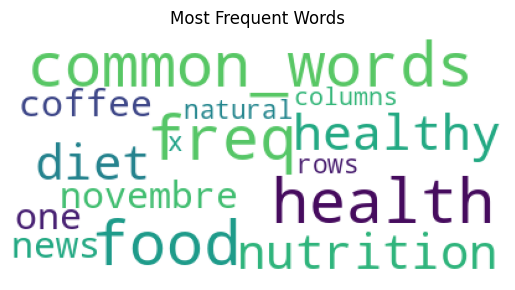

In [ ]:
# now we look at the most frequent words:
common_words = pd.Series(' '.join(df['Text']).split()).value_counts()[:100]
common_words = pd.DataFrame({'common_words':common_words.index, 'freq':common_words.values})
common_words_list = common_words['common_words'].values.tolist()
print(common_words)

# removing the most freqeunt words:
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in common_words_list))

# a visualisation (word cloud) is made below:
wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(common_words))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Frequent Words')
plt.show()

## Lemmatisation

In [ ]:
# the text will be lemmatised
lemmtizer = WordNetLemmatizer()
def lemmatize_function(sent):
  word_list = sent.split()
  lemma_word_list = [lemmtizer.lemmatize(word) for word in word_list]
  lemma_sentence = " ".join(lemma_word_list)
  return lemma_sentence

df['Text_lemmatised'] = df['Text'].apply(lemmatize_function)
#df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Stemming

In [ ]:
# the text will be stemmed
stemmer = PorterStemmer()
def stemming_function(sent):
  word_list = sent.split()
  stemmed_word_list = [stemmer.stem(word) for word in word_list]
  stemmed_sentence = " ".join(stemmed_word_list)
  return stemmed_sentence

df['Text_stemmed'] = df['Text'].apply(stemming_function)

# make a seperate column where text has been both stemmed and lemmatised
df['Text_both'] = df['Text_lemmatised'].apply(stemming_function)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Datetime,Tweet Id,Text,Username,Text_lemmatised,Text_stemmed,Text_both
0,30/01/2022 22:41,1.490000e+18,late simple easy inputs sunday vibes mood,A1N10M_Logging,late simple easy input sunday vibe mood,late simpl easi input sunday vibe mood,late simpl easi input sunday vibe mood
1,30/01/2022 22:37,1.490000e+18,lettuce wraps shorts ytshorts lunch,nazmulmarketer1,lettuce wrap short ytshorts lunch,lettuc wrap short ytshort lunch,lettuc wrap short ytshort lunch
2,30/01/2022 20:22,1.490000e+18,humor,vanillaspice82,humor,humor,humor
3,30/01/2022 20:01,1.490000e+18,zone balanced meal carb blocks kodiak pancakes...,ZHealthyEating,zone balanced meal carb block kodiak pancake e...,zone balanc meal carb block kodiak pancak egg ...,zone balanc meal carb block kodiak pancak egg ...
4,30/01/2022 19:15,1.490000e+18,experts say top types improve brain prevent de...,personalfitnes3,expert say top type improve brain prevent deme...,expert say top type improv brain prevent demen...,expert say top type improv brain prevent demen...


In [ ]:
df.sample(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Datetime,Tweet Id,Text,Username,Text_lemmatised,Text_stemmed,Text_both
19047,21/07/2021 19:35,1.420000e+18,mango milkshake ice cream jugaadrasoi jugaad d...,jugaadrasoi,mango milkshake ice cream jugaadrasoi jugaad d...,mango milkshak ice cream jugaadrasoi jugaad dr...,mango milkshak ice cream jugaadrasoi jugaad dr...
4257,29/11/2021 19:45,1.470000e+18,become complicated publishous medium firstworl...,DFeazelle,become complicated publishous medium firstworl...,becom complic publish medium firstworldproblem,becom complic publish medium firstworldproblem
16037,19/08/2021 11:00,1.430000e+18,no added no grains easy amazing paleo banana b...,natltriblog,no added no grain easy amazing paleo banana br...,no ad no grain easi amaz paleo banana bread ho...,no ad no grain easi amaz paleo banana bread ho...
23357,12/06/2021 23:12,1.400000e+18,fault youre selfimprovement,Proofpositive,fault youre selfimprovement,fault your selfimprov,fault your selfimprov
22531,20/06/2021 20:48,1.410000e+18,strange chocolate coming straight trees chocol...,CarbonCraftLtd,strange chocolate coming straight tree chocola...,strang chocol come straight tree chocol sicili...,strang chocol come straight tree chocol sicili...
19514,17/07/2021 13:42,1.420000e+18,nurturing essential custom meal plans biju wor...,gym_spokane,nurturing essential custom meal plan biju work...,nurtur essenti custom meal plan biju work meal...,nurtur essenti custom meal plan biju work meal...
15949,20/08/2021 7:06,1.430000e+18,roasted nuts seeds youtube middleeast blogger ...,organicdishes,roasted nut seed youtube middleeast blogger so...,roast nut seed youtub middleeast blogger soup ...,roast nut seed youtub middleeast blogger soup ...
14911,30/08/2021 12:57,1.430000e+18,easily chop fresh herbs without ripping blemis...,Yittzy2,easily chop fresh herb without ripping blemish...,easili chop fresh herb without rip blemish sho...,easili chop fresh herb without rip blemish sho...
1023,15/01/2022 11:42,1.480000e+18,never fasteat slowly reduse cause takes recive...,Fitness1forlife,never fasteat slowly reduse cause take recive ...,never fasteat slowli redus caus take reciv sig...,never fasteat slowli redus caus take reciv sig...
7425,6/11/2021 17:57,1.460000e+18,broccoli carrots bell peppers brussels sprouts...,YouTubeFitness3,broccoli carrot bell pepper brussels sprout fa...,broccoli carrot bell pepper brussel sprout fav...,broccoli carrot bell pepper brussel sprout fav...


# **Feature Extraction from Text**

## N-grams

In [ ]:
# making n-grams
n = 3
def n_grams(text):
  if len(word_tokenize(text)) < 3:
    return []
  n_grams = ngrams(word_tokenize(text), n)
  return [' '.join(grams) for grams in n_grams]

df['n_grams'] = df['Text_both'].apply(lambda x: n_grams(x))
#df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Bag of Words 

In [ ]:
# bag of words model
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1), analyzer = "word")
X_bow = bow.fit_transform(df['Text_stemmed'])
print(X_bow)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  (0, 808)	1
  (0, 268)	1
  (0, 858)	1
  (0, 591)	1
  (1, 516)	1
  (1, 803)	1
  (1, 542)	1
  (3, 998)	2
  (3, 64)	1
  (3, 557)	1
  (3, 130)	1
  (3, 91)	1
  (3, 274)	1
  (4, 296)	1
  (4, 782)	1
  (4, 904)	1
  (4, 929)	1
  (4, 454)	1
  (4, 103)	1
  (4, 702)	1
  (4, 801)	1
  (5, 976)	2
  (5, 408)	1
  (5, 96)	1
  (5, 355)	1
  :	:
  (19848, 997)	1
  (19848, 869)	1
  (19848, 269)	1
  (19848, 584)	1
  (19848, 92)	1
  (19848, 849)	1
  (19848, 689)	1
  (19848, 240)	1
  (19848, 857)	1
  (19849, 126)	1
  (19849, 451)	1
  (19849, 232)	1
  (19850, 322)	1
  (19850, 92)	1
  (19850, 320)	1
  (19851, 454)	1
  (19851, 255)	1
  (19851, 424)	1
  (19851, 161)	1
  (19851, 750)	1
  (19851, 509)	1
  (19851, 245)	1
  (19851, 555)	1
  (19851, 459)	2
  (19851, 348)	1


## Inverse Document Frequency

In [ ]:
# Inverse Document Frequency
vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(df['Text_stemmed'])
print(tf_idf[:30])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  (0, 16618)	0.31295871029519323
  (0, 26558)	0.43760925233850495
  (0, 24009)	0.35851852524231603
  (0, 12841)	0.48576683875265053
  (0, 7173)	0.2930254864743183
  (0, 22715)	0.3077566481544721
  (0, 14414)	0.40678242727242864
  (1, 15208)	0.32222018843067296
  (1, 27944)	0.6112280191790583
  (1, 22594)	0.40648357861312145
  (1, 27655)	0.4830238969711683
  (1, 14642)	0.3521838639273567
  (2, 12198)	1.0
  (3, 7452)	0.24028994099345666
  (3, 18729)	0.3185841105257519
  (3, 14185)	0.42353159700126236
  (3, 2673)	0.29779246868756565
  (3, 3647)	0.24926584265582108
  (3, 15805)	0.20093034504194657
  (3, 1801)	0.25962116971910426
  (3, 28067)	0.6346620558001667
  (4, 22472)	0.2815726016163862
  (4, 6126)	0.43845370043453247
  (4, 19998)	0.32394826864857634
  (4, 2994)	0.3204768418429743
  :	:
  (27, 23315)	0.3025487902109057
  (27, 4741)	0.25794855593009186
  (27, 14519)	0.3025487902109057
  (27, 8988)	0.3025487902109057
  (27, 26585)	0.15753582924151294
  (27, 25310)	0.20373931262422487
  

## Temporal Analysis

In [ ]:
df['Datetime'].dtype

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dtype('O')

In [ ]:
# Time-based analysis
# Grouping the reviews by day:
# Step 1, making the datetime column into Datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])
# Step 2: Keeping only the date from the Datetime column in a new column called 'Date'
df['Day'] = df['Datetime'].dt.date
df['Month'] = df['Datetime'].dt.month
df['Year'] = df['Datetime'].dt.year
# Grouping by the Date column
df_date_wise = df.groupby(['Day'])['Text_stemmed'].count().reset_index(name='tweet_count').set_index('Day')
#df_date_wise.sample

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# now to make a chart showing frequency by time:
fig = px.line(df_date_wise, y='tweet_count')
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Sentiment Analysis

In [ ]:
# Extracting sentiment from the tweets
# Only run this cell once since it takes a long time to complete
from textblob import TextBlob
df['sentiment'] = df['Text_both'].apply(lambda x: TextBlob(x).sentiment.polarity)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Datetime,Tweet Id,Text,Username,Text_lemmatised,Text_stemmed,Text_both,n_grams,Day,Month,Year,sentiment
0,2022-01-30 22:41:00,1.490000e+18,late simple easy inputs sunday vibes mood,A1N10M_Logging,late simple easy input sunday vibe mood,late simpl easi input sunday vibe mood,late simpl easi input sunday vibe mood,"[late simpl easi, simpl easi input, easi input...",2022-01-30,1,2022,-0.3
1,2022-01-30 22:37:00,1.490000e+18,lettuce wraps shorts ytshorts lunch,nazmulmarketer1,lettuce wrap short ytshorts lunch,lettuc wrap short ytshort lunch,lettuc wrap short ytshort lunch,"[lettuc wrap short, wrap short ytshort, short ...",2022-01-30,1,2022,0.0
2,2022-01-30 20:22:00,1.490000e+18,humor,vanillaspice82,humor,humor,humor,[],2022-01-30,1,2022,0.0
3,2022-01-30 20:01:00,1.490000e+18,zone balanced meal carb blocks kodiak pancakes...,ZHealthyEating,zone balanced meal carb block kodiak pancake e...,zone balanc meal carb block kodiak pancak egg ...,zone balanc meal carb block kodiak pancak egg ...,"[zone balanc meal, balanc meal carb, meal carb...",2022-01-30,1,2022,0.0
4,2022-01-30 19:15:00,1.490000e+18,experts say top types improve brain prevent de...,personalfitnes3,expert say top type improve brain prevent deme...,expert say top type improv brain prevent demen...,expert say top type improv brain prevent demen...,"[expert say top, say top type, top type improv...",2022-01-30,1,2022,0.5


In [ ]:
df_date_wise.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,tweet_count
Day,
2021-01-07,87
2021-01-08,63
2021-01-09,97
2021-01-10,96
2021-01-11,103


In [ ]:
# See the tweets with the highest sentiment
high_sentiment_df = df.sort_values('sentiment', ascending=False)
high_sentiment_df = high_sentiment_df[['sentiment', 'Text_both']]
high_sentiment_df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,sentiment,Text_both
15712,1.0,guy import gain gener dont depriv nutrient req...
4131,1.0,veget minestron perfect winter nov novemb tues...
19818,1.0,doesnt look perfect gold deal togeth veganfood...
203,1.0,perfect effort bring effort everi singl that t...
14991,1.0,bread glutenfre homemad chef diabet blood home...
10003,1.0,perfect midmealsnack carb plantprotein veggi l...
4702,1.0,wasa turkey mushroom perfect lunch ever tri fr...
18593,1.0,perfect basmati rice youtub guitar delhi uk us...
18592,1.0,perfect basmati rice youtub guitar delhi uk us...
4612,1.0,lunchtim creami butternut squash soup baresnac...


In [ ]:
# See the tweets with the lowest sentiment
low_sentiment_df = df.sort_values('sentiment')
low_sentiment_df = low_sentiment_df[['sentiment', 'Text_both']]
low_sentiment_df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,sentiment,Text_both
2272,-1.0,today blog today worst recommend
5943,-1.0,burger besid cruel disgust made suffer ever so...
21433,-1.0,shouldnt sleep worst bed lamuscl beforesleep s...
41,-1.0,worst expert say dine groceri
13194,-1.0,worst bedtim
12041,-1.0,worst enemi one
678,-1.0,worst child brain say studi brain child child
16463,-1.0,everyth els veget oil worst fitnessmotiv bodyb...
241,-1.0,guidelin choos avoid worst choic matter lot yo...
16280,-1.0,worst habit inflamm say scienc feedli


In [ ]:
# Plotting sentiment over time (using mean):

# Grouping by date
df_date_wise = df.groupby(['Day'])['sentiment'].mean().reset_index(name='sentiment').set_index('Day')

# Plotting the line graph
fig1 = px.line(df_date_wise, y='sentiment')
fig1.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# See what caused the high sentiment (0.4528) spike on July 4, 2021
df['Day'] = pd.to_datetime(df['Day'])   # converting Day column to Datetime format first
df_sentiment_spike = df[df['Day'] == '2021-07-04']    # seeing which tweets occurred on that day
df_sentiment_spike.sort_values('sentiment', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Datetime,Tweet Id,Text,Username,Text_lemmatised,Text_stemmed,Text_both,n_grams,Day,Month,Year,sentiment


In [ ]:
# See what caused the low sentiment spike on Nov 22, 2020 (0.06), and on June 27, 2021 (0.06).
df_sentiment_spike = df[df['Day'] == '2020-11-22']    # seeing which tweets occurred on that day
df_sentiment_spike.sort_values('sentiment')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Datetime,Tweet Id,Text,Username,Text_lemmatised,Text_stemmed,Text_both,n_grams,Day,Month,Year,sentiment


In [ ]:
# and on June 27, 2021:
df_sentiment_spike = df[df['Day'] == '2021-06-27']    # seeing which tweets occurred on that day
df_sentiment_spike.sort_values('sentiment')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Datetime,Tweet Id,Text,Username,Text_lemmatised,Text_stemmed,Text_both,n_grams,Day,Month,Year,sentiment
21880,2021-06-27 07:20:00,1.410000e+18,book well researched sought loads information ...,storizenmag,book well researched sought load information p...,book well research sought load inform practic ...,book well research sought load inform practic ...,"[book well research, well research sought, res...",2021-06-27,6,2021,-1.000000
21865,2021-06-27 11:18:00,1.410000e+18,repost sadhguru make_repost bad sadhguru inspi...,VickyRatnani,repost sadhguru make_repost bad sadhguru inspi...,repost sadhguru make_repost bad sadhguru inspi...,repost sadhguru make_repost bad sadhguru inspi...,"[repost sadhguru make_repost, sadhguru make_re...",2021-06-27,6,2021,-0.700000
21852,2021-06-27 15:03:00,1.410000e+18,enriched flour hfcs need drastically reduced g...,AutonomousHoag,enriched flour hfc need drastically reduced ga...,enrich flour hfc need drastic reduc garbag got...,enrich flour hfc need drastic reduc garbag got...,"[enrich flour hfc, flour hfc need, hfc need dr...",2021-06-27,6,2021,-0.333333
21889,2021-06-27 04:00:00,1.410000e+18,question evolution evolutionary mean webster d...,EvolEatsLu,question evolution evolutionary mean webster d...,question evolut evolutionari mean webster defi...,question evolut evolutionari mean webster defi...,"[question evolut evolutionari, evolut evolutio...",2021-06-27,6,2021,-0.306250
21857,2021-06-27 13:10:00,1.410000e+18,ruha nutrivolutionsit disease nothing conseque...,sg_insider,ruha nutrivolutionsit disease nothing conseque...,ruha nutrivolutionsit diseas noth consequ habi...,ruha nutrivolutionsit diseas noth consequ habi...,"[ruha nutrivolutionsit diseas, nutrivolutionsi...",2021-06-27,6,2021,-0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...
21883,2021-06-27 06:17:00,1.410000e+18,kids pure keep em stop feeding bs feeding trai...,AceBoogieeBMW,kid pure keep em stop feeding b feeding traine...,kid pure keep em stop feed bs feed train kid t...,kid pure keep em stop feed b feed train kid tr...,"[kid pure keep, pure keep em, keep em stop, em...",2021-06-27,6,2021,0.214286
21874,2021-06-27 08:47:00,1.410000e+18,matcha tea special form green tea leaves finel...,GloryDey1,matcha tea special form green tea leaf finely ...,matcha tea special form green tea leav fine po...,matcha tea special form green tea leaf fine po...,"[matcha tea special, tea special form, special...",2021-06-27,6,2021,0.237202
21853,2021-06-27 15:01:00,1.410000e+18,cook low carb rice mins part lighter curry faj...,MrRands,cook low carb rice min part lighter curry faji...,cook low carb rice min part lighter curri faji...,cook low carb rice min part lighter curri faji...,"[cook low carb, low carb rice, carb rice min, ...",2021-06-27,6,2021,0.244444
21825,2021-06-27 21:39:00,1.410000e+18,packaging full toxic chemicals heres could aff...,stevebaynes,packaging full toxic chemical here could affec...,packag full toxic chemic here could affect car...,packag full toxic chemic here could affect car...,"[packag full toxic, full toxic chemic, toxic c...",2021-06-27,6,2021,0.350000


## Topic Modelling

### Pre-preprocessing

In [ ]:
# Topic modelling will be done with LDA algorithm
# Setting up the environment for LDA algorithm.

TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "/tmp" will be used to save temporary dictionary and corpus.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Convert the tweets as the text corpus.
# For this, the stemmed tweets will be used.
corpus = list(df['Text_stemmed'])

# Alphabetically sort each tweet before making the dictionary
df['Text_stemmed'] = df['Text_stemmed'].apply(lambda x: ' '.join(sorted(x.split())))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
corpus[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['late simpl easi input sunday vibe mood',
 'lettuc wrap short ytshort lunch',
 'humor',
 'zone balanc meal carb block kodiak pancak egg zone',
 'expert say top type improv brain prevent dementia share']

In [ ]:
# Tokenization
tweets = [[word for word in str(document).split()] for document in corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
tweets[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[['late', 'simpl', 'easi', 'input', 'sunday', 'vibe', 'mood'],
 ['lettuc', 'wrap', 'short', 'ytshort', 'lunch'],
 ['humor'],
 ['zone',
  'balanc',
  'meal',
  'carb',
  'block',
  'kodiak',
  'pancak',
  'egg',
  'zone'],
 ['expert',
  'say',
  'top',
  'type',
  'improv',
  'brain',
  'prevent',
  'dementia',
  'share']]

In [ ]:
# Create a dictionary based on the tokenized words of all the tweets.
dictionary = corpora.Dictionary(tweets)

# Save the above dictionary as a local file for LDA model to access.
dictionary.save(os.path.join(TEMP_FOLDER, 'tweets.dict'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Print the dictionary
print(dictionary.token2id)

{'easi': 0, 'input': 1, 'late': 2, 'mood': 3, 'simpl': 4, 'sunday': 5, 'vibe': 6, 'lettuc': 7, 'lunch': 8, 'short': 9, 'wrap': 10, 'ytshort': 11, 'humor': 12, 'balanc': 13, 'block': 14, 'carb': 15, 'egg': 16, 'kodiak': 17, 'meal': 18, 'pancak': 19, 'zone': 20, 'brain': 21, 'dementia': 22, 'expert': 23, 'improv': 24, 'prevent': 25, 'say': 26, 'share': 27, 'top': 28, 'type': 29, 'bodi': 30, 'fuel': 31, 'hard': 32, 'immun': 33, 'support': 34, 'system': 35, 'winter': 36, 'alreadi': 37, 'chef': 38, 'excit': 39, 'garden': 40, 'lescargotbleu': 41, 'look': 42, 'next': 43, 'nodig': 44, 'progress': 45, 'season': 46, 'sustain': 47, 'check': 48, 'dietplan': 49, 'got': 50, 'healthtip': 51, 'mealprep': 52, 'statu': 53, 'step': 54, 'vitamin': 55, 'vitamind': 56, 'what': 57, 'anim': 58, 'animalcruelti': 59, 'bangmo': 60, 'bowel': 61, 'diseas': 62, 'endfactoryfarm': 63, 'fed': 64, 'gmo': 65, 'govern': 66, 'haemorrhag': 67, 'intestin': 68, 'involv': 69, 'kept': 70, 'knowledg': 71, 'outsid': 72, 'pig': 7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Convert the text dictionary to bag of words model
corpus = [dictionary.doc2bow(text) for text in tweets]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Generating Topic Model

In [ ]:
# Construct TF-IDF features from the dictionary.
tfidf = models.TfidfModel(corpus)

# Transform the tweets as TF-IDF feature vectors
corpus_tfidf = tfidf[corpus]

# Set how many topics are required
total_topics = 40

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

# Print the Keyword in the 10 topics
lda.show_topics(total_topics, num_words=6)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(0,
  '0.051*"fresh" + 0.030*"weightlossjourney" + 0.029*"lunch" + 0.022*"serv" + 0.017*"sundayvib" + 0.016*"sunday"'),
 (1,
  '0.059*"usa" + 0.051*"uk" + 0.030*"gut" + 0.022*"salad" + 0.021*"check" + 0.019*"eathealthi"'),
 (2,
  '0.060*"daili" + 0.047*"muscl" + 0.043*"heart" + 0.041*"visit" + 0.037*"improv" + 0.034*"thank"'),
 (3,
  '0.038*"women" + 0.035*"nutrit" + 0.031*"calori" + 0.026*"oil" + 0.021*"review" + 0.019*"simpl"'),
 (4,
  '0.053*"foodblogg" + 0.047*"mind" + 0.041*"motiv" + 0.041*"inspir" + 0.038*"japan" + 0.030*"soup"'),
 (5,
  '0.036*"everi" + 0.033*"thing" + 0.028*"commun" + 0.025*"help" + 0.022*"consum" + 0.019*"educ"'),
 (6,
  '0.042*"creat" + 0.033*"energi" + 0.031*"environ" + 0.031*"sustain" + 0.019*"dr" + 0.019*"climatechang"'),
 (7,
  '0.052*"healthtip" + 0.043*"quot" + 0.038*"diet" + 0.034*"chang" + 0.030*"research" + 0.025*"part"'),
 (8,
  '0.050*"keto" + 0.049*"top" + 0.045*"footbal" + 0.042*"brain" + 0.024*"function" + 0.022*"articl"'),
 (9,
  '0.062*"child

### Interactive Topic Analyser

In [ ]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# Extracting CSV file

In [ ]:
df.to_csv('nlp.csv')

In [ ]:
text_both = df.drop(['Username','Datetime','Tweet Id','Text_lemmatised','Text_stemmed','Text'], axis=1)

In [ ]:
Text_both = text_both

In [ ]:
Text_both.head()

In [ ]:
Text_both['Text_both'].str.split()